# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.rcParams.update({'font.size': 16})

/home/klxh/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

#### <span style="color:darkred"> UNIFORM DISTRIBUTION </span>
It's plotted the difference $I - I_0$ against the block number. $I$ is the MC estimation of the integral, $I_0$ is the true value.

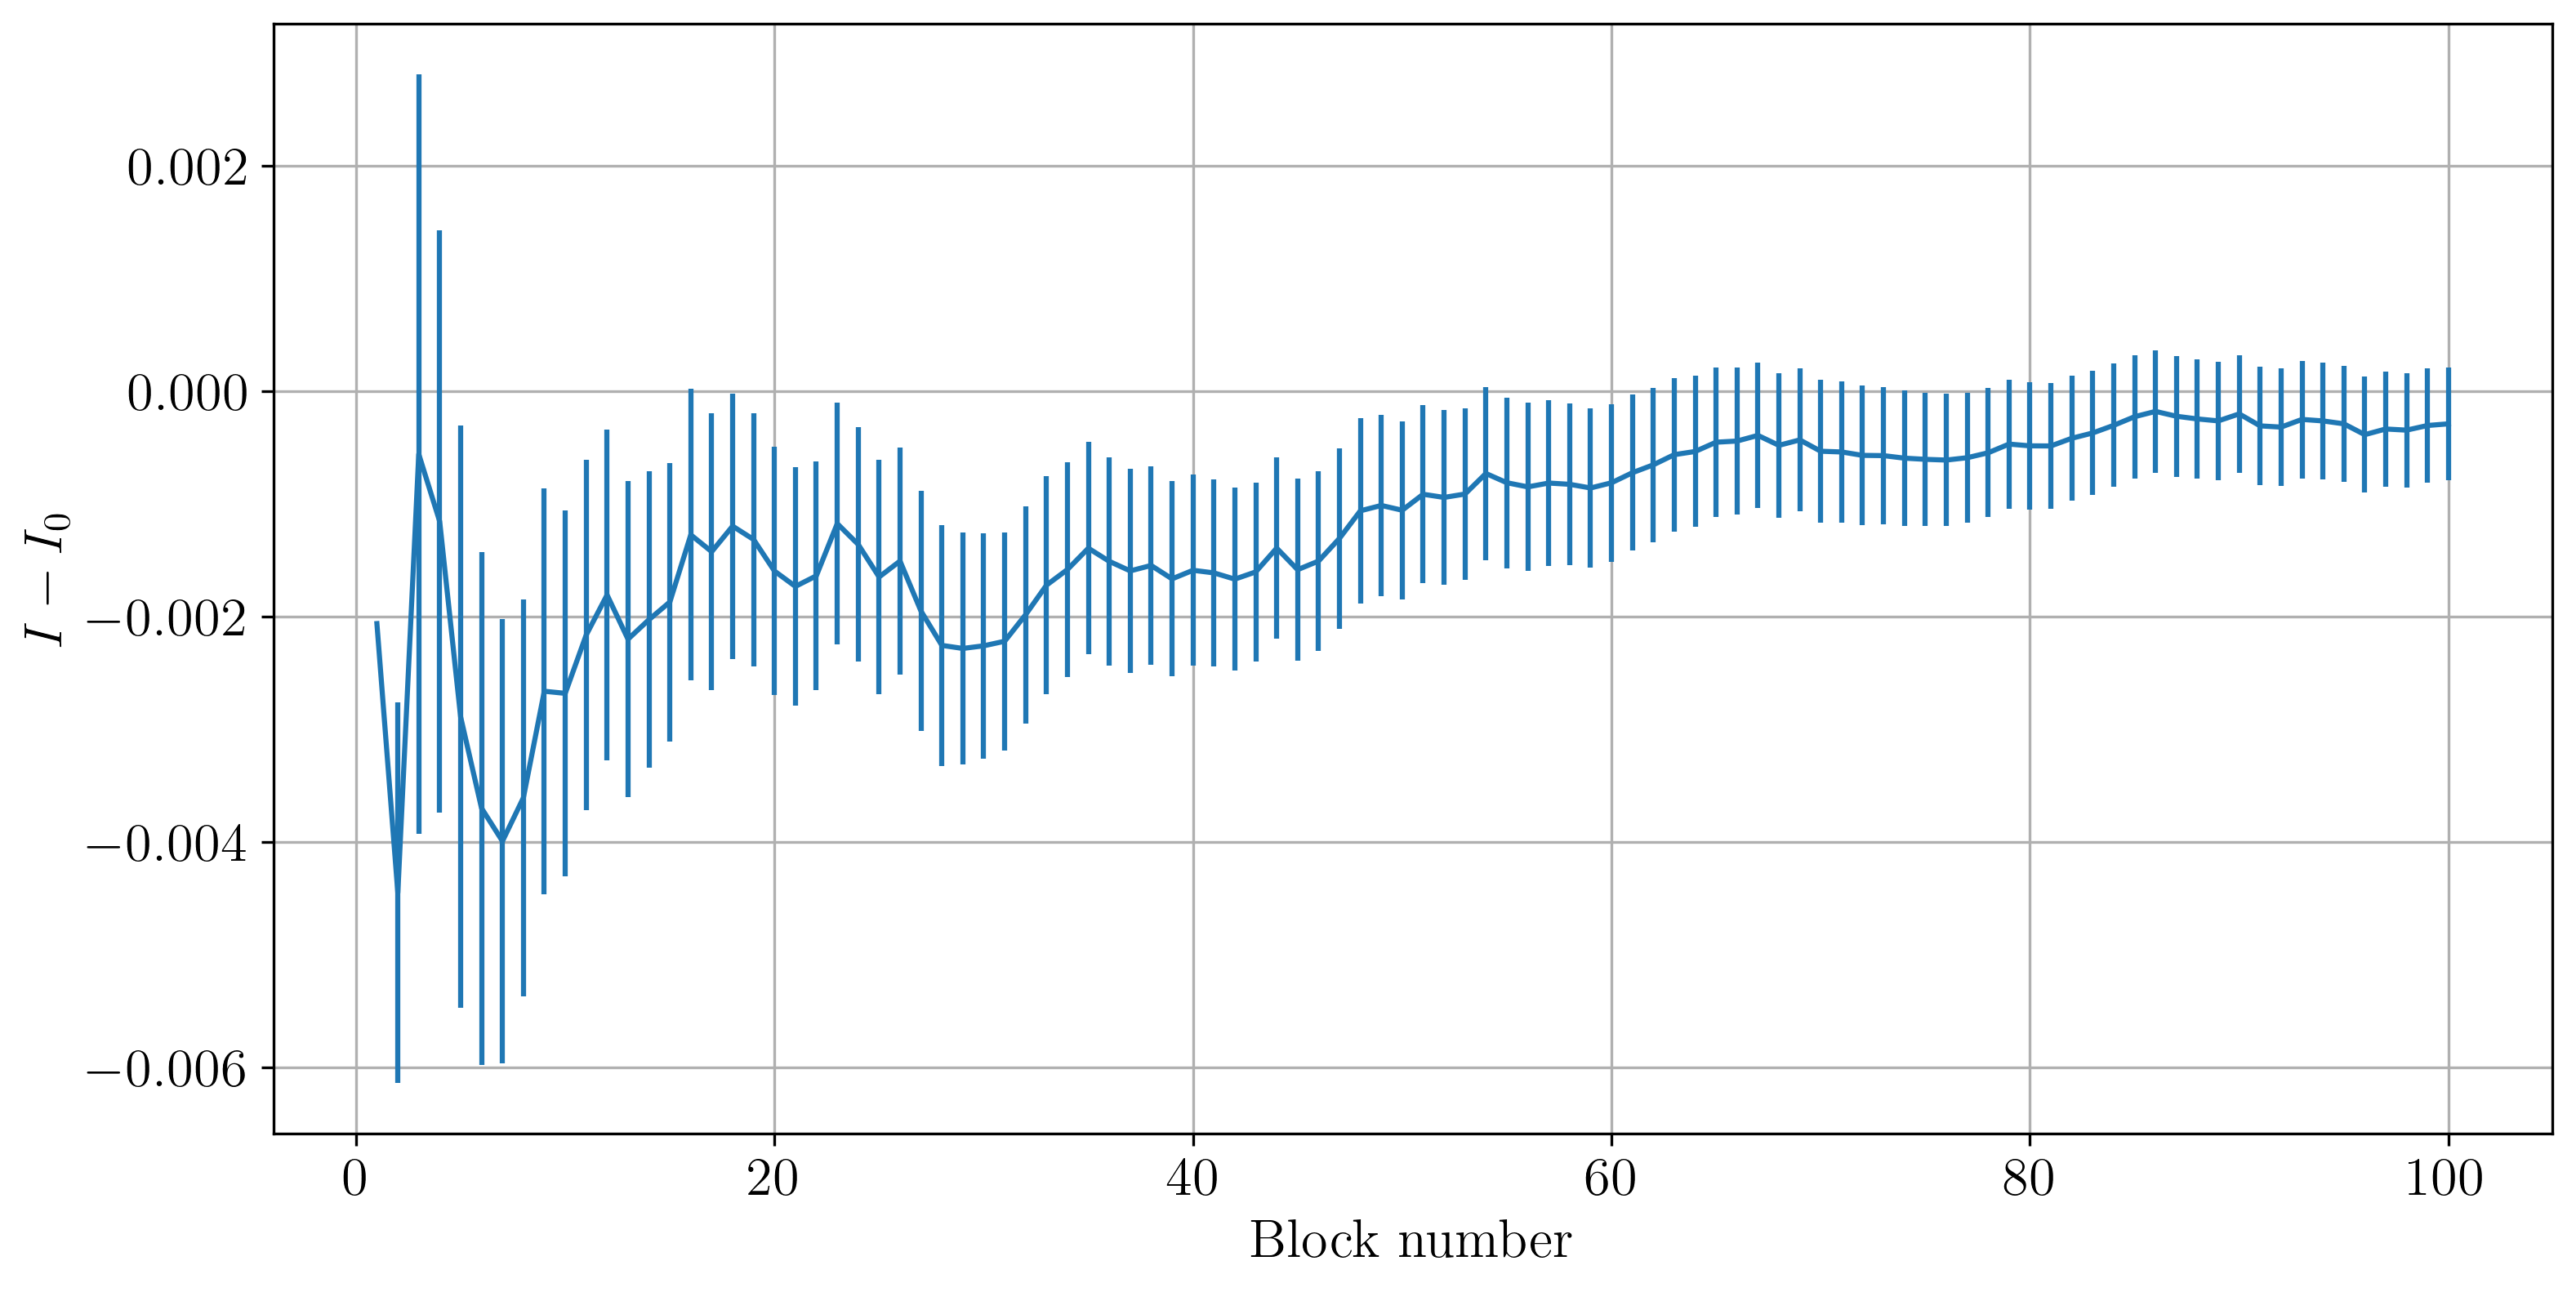

In [2]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

x, f, error = np.loadtxt("02.1/data/uniform.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Block number')
plt.ylabel('$I-I_0$')
plt.grid(True)

plt.show()

#### <span style="color:darkred"> IMPORTANCE SAMPLING </span>
I sampled according to the function $p(x) = \frac{3}{2}(1 - x^2$), $x \in [0,1)$. The second order Taylor expansion of the integrand, which better approximates the integrand in a small neighbourhood of $0$, does not appear a good candidate since it becomes negative in the integration domain. The three functions (not normalized) are displayed in the figure below.

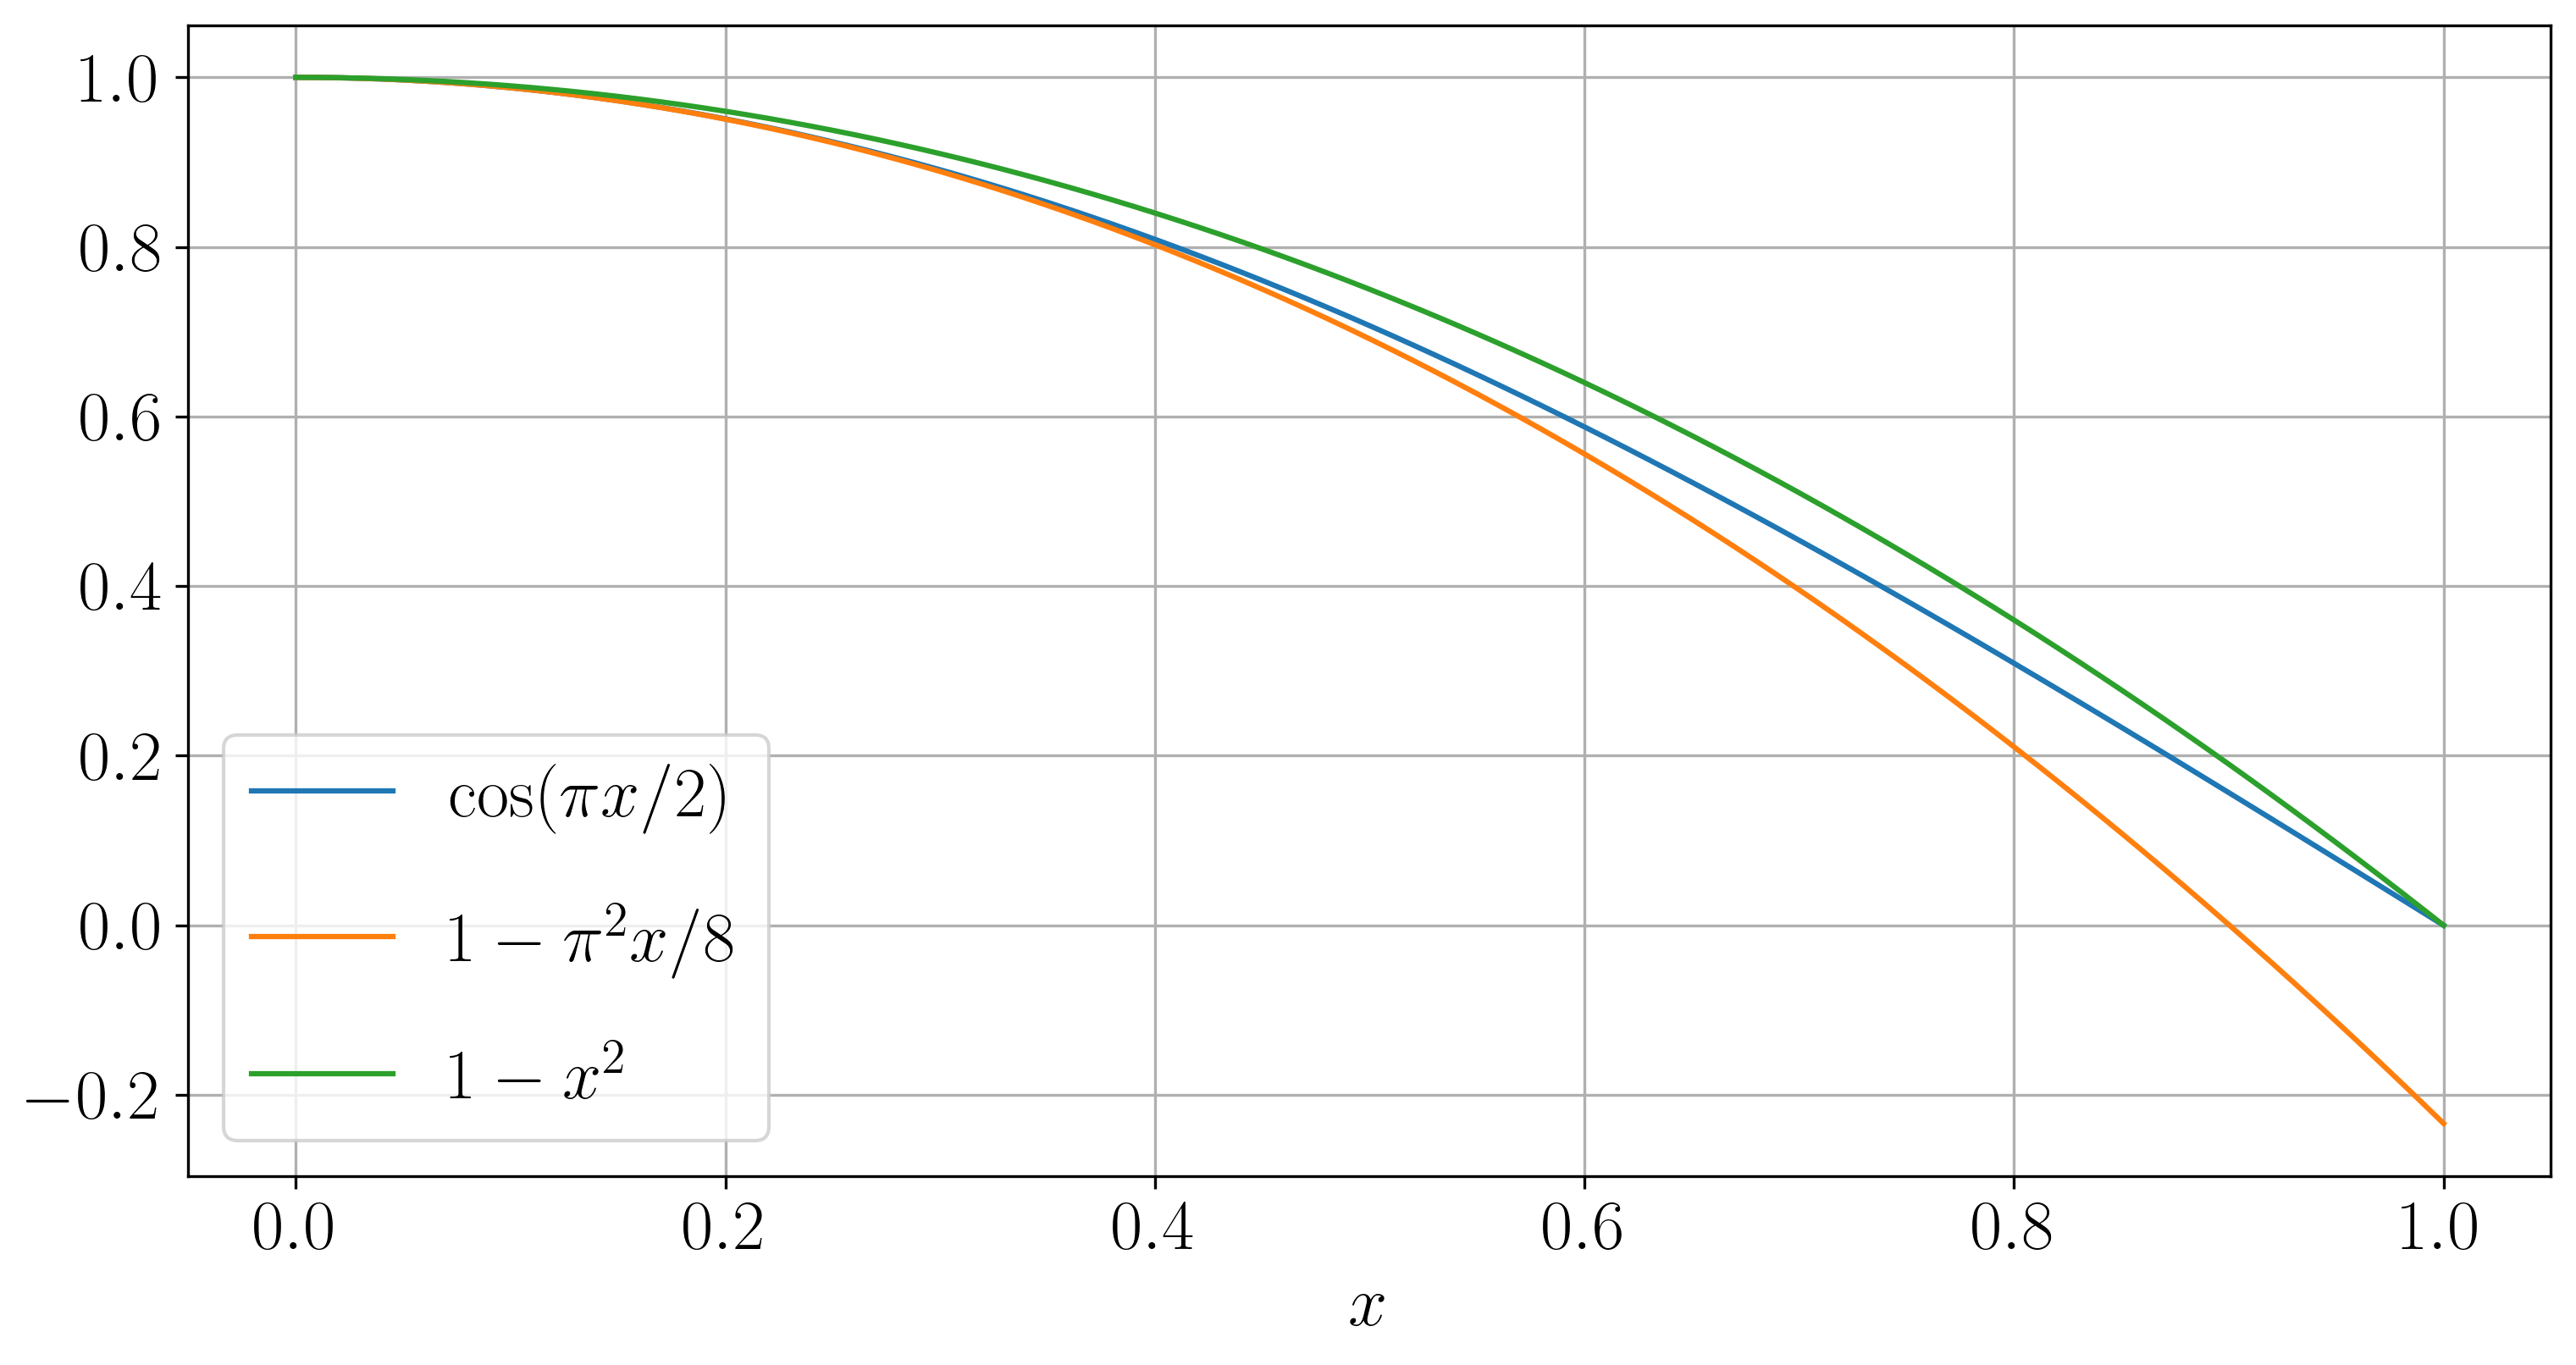

In [3]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

x = np.arange(0,1.01,.01)
f1 = np.cos(.5*np.pi*x)
f2 = 1-.5*(.5*np.pi*x)**2
f3 = 1-x**2
plt.xlabel('$x$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x, f1, label='$\cos(\pi x/2)$')
plt.plot(x, f2, label='$1-\pi^2 x / 8$')
plt.plot(x, f3, label='$1-x^2$')

plt.legend(loc='lower left', fontsize=20, labelspacing=1, handlelength=2)
plt.grid(True)

plt.show()

The results of the integration are shown in the figure that follows. The number of integrand evaluations is the same for the two simulations, but the relative error is clearly smaller for importance sampling. However, I sampled from $p(x)=\frac{3}{2}(1 - x^2)$ using the rejection method, which has a greater cost in terms of computational time per integrand evaluation than sampling from the uniform distribution. For instance, in the simulation plotted below, the rejection method employed $\sim 3 \times 10^6$ calls to the PRNG, giving a statistical uncertainty of $5.5 \times 10^{-5}$. For comparison, sampling $10^6$ numbers from the uniform distribution gave an uncertainty of $5.0 \times 10^{-4}$. Therefore, while the accuracy from importance sampling is here smaller by an order of magnitude, the accuracy per PRNG call improved only by roughly a factor of $3$.

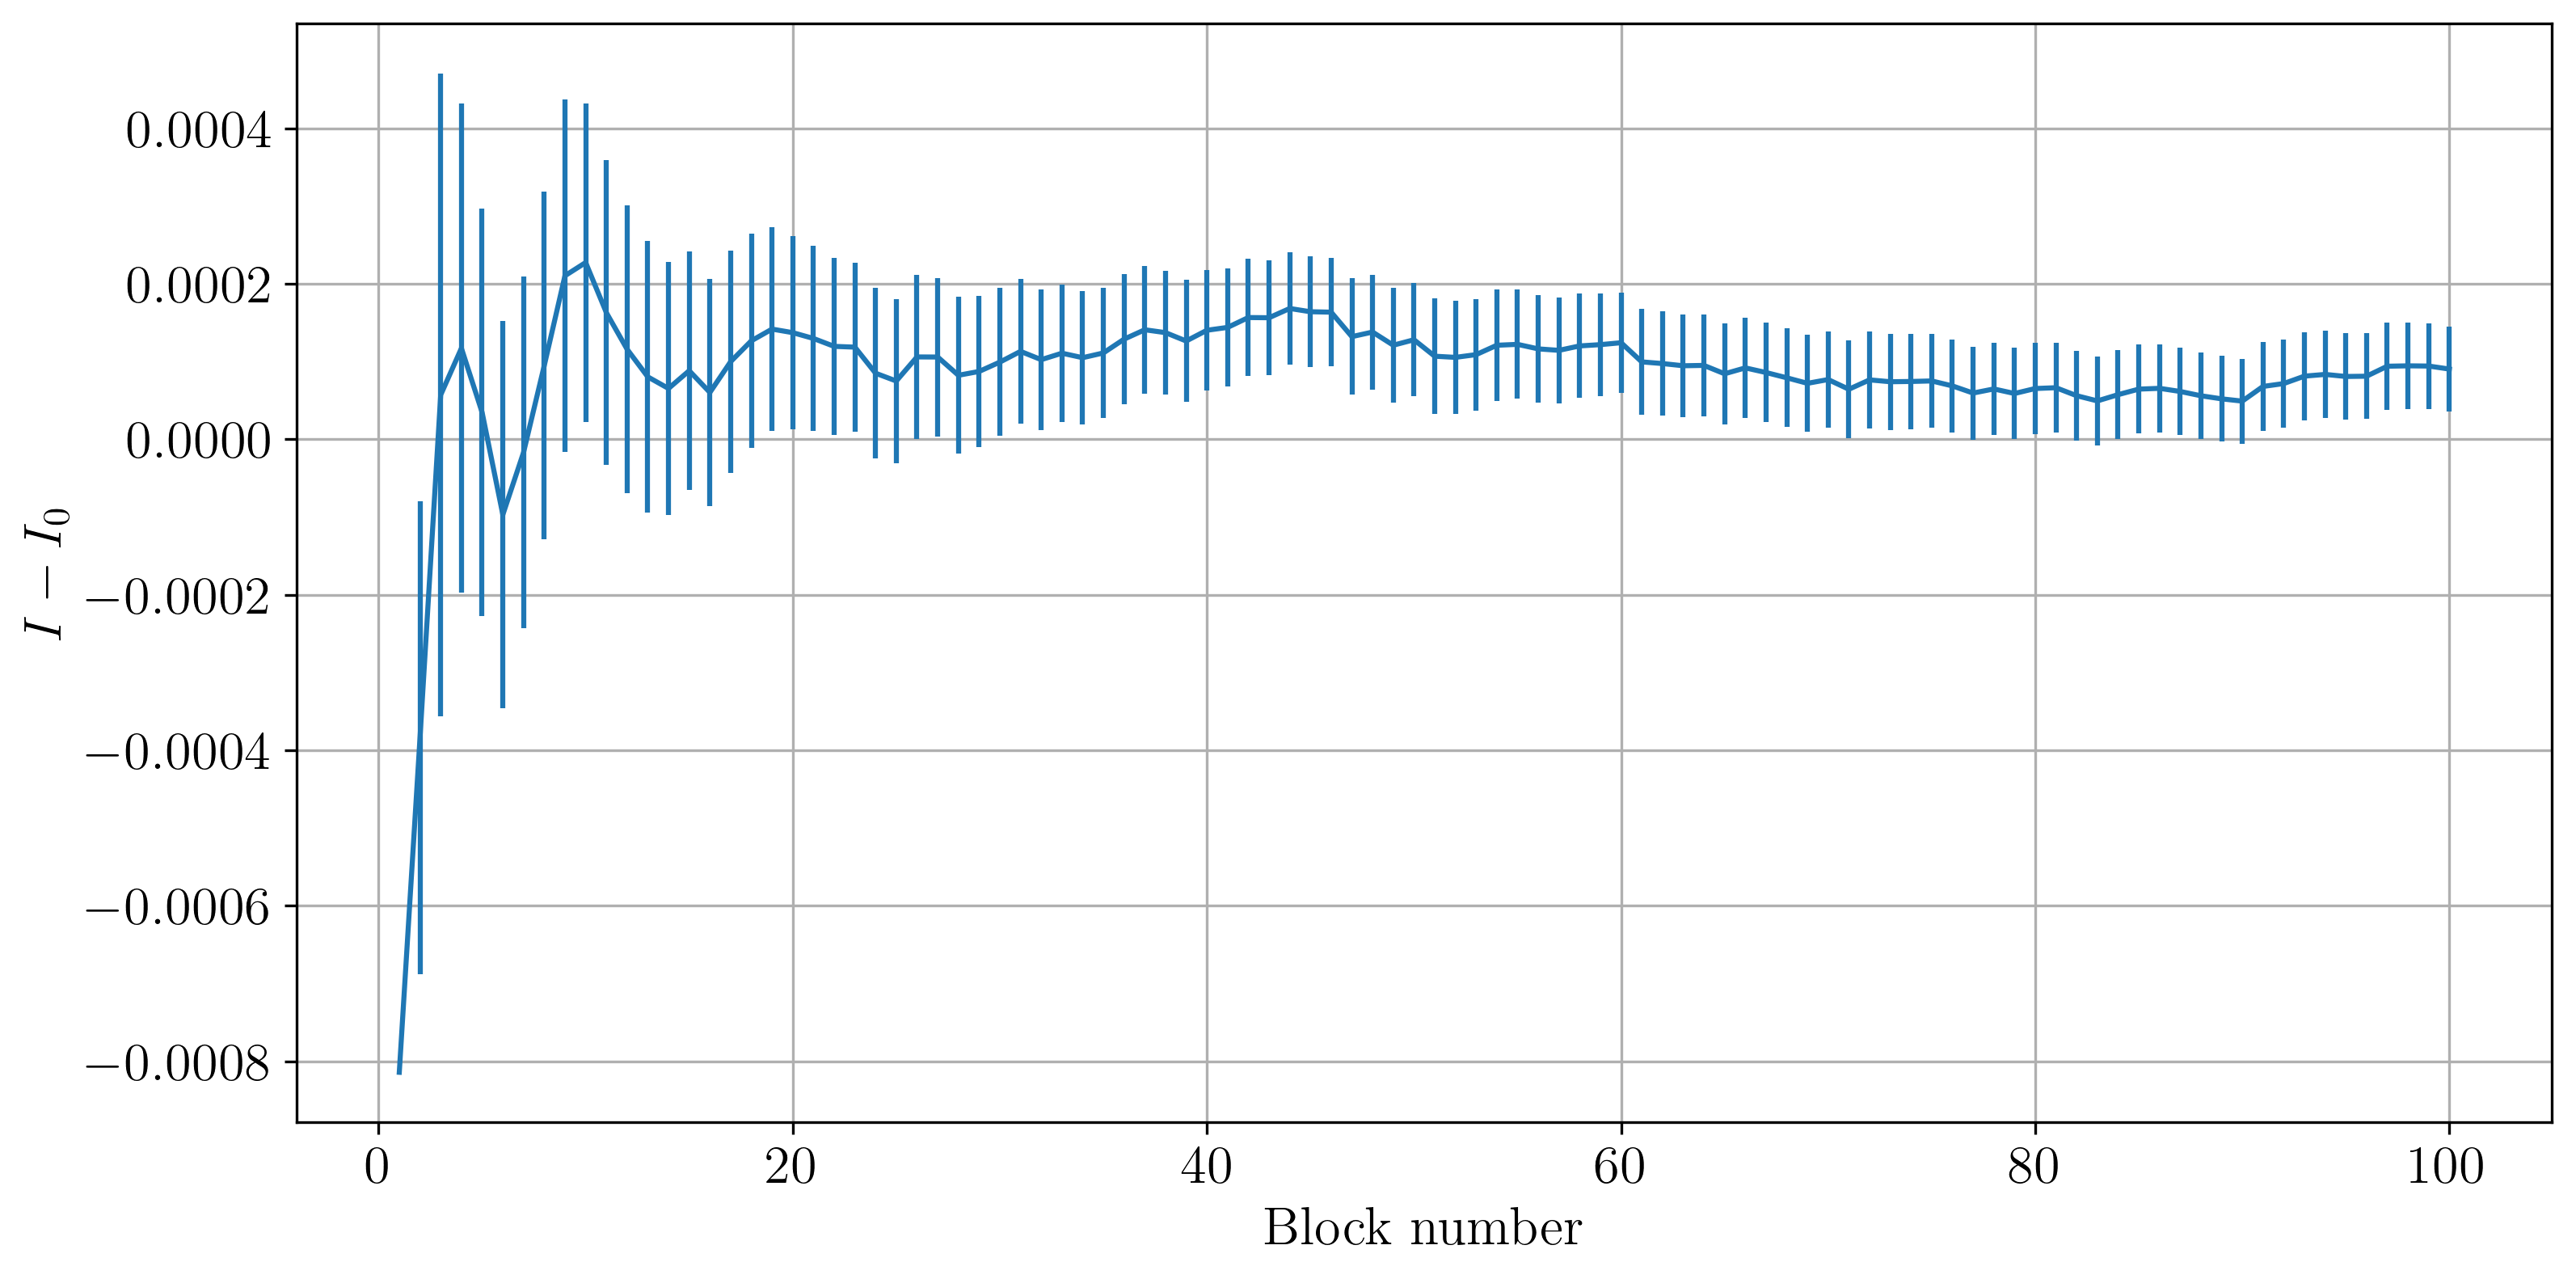

In [4]:
plt.subplots(1, 1, figsize=(12,6), dpi=300)

x, f, error = np.loadtxt("02.1/data/importance.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('Block number')
plt.ylabel('$I-I_0$')
plt.grid(True)

plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

#### <span style="color:darkred">CUBIC LATTICE</span>
In the figure below it's shown the RMSD (with statistical uncertainties) computed from an ensemble of $10^4$ sample paths as a function of time. The expected behaviour is $\texttt{MSD}(t) = \frac{a^2}{\tau}t$. Here the lattice constant is set to $a = 1$ and the elementary time step is $\tau = 1$, therefore we expect $\texttt{RMSD}(t) = \sqrt t$. The output of the following cell shows the result of a fit with a function of the form $f(t) = k t^\beta$. The determined fitting parameters indicate a diffusive behaviour.

optimized parameters [k b] =
[0.99252693 0.50253322]
parameters uncertainty =
[0.00290271 0.00070615]


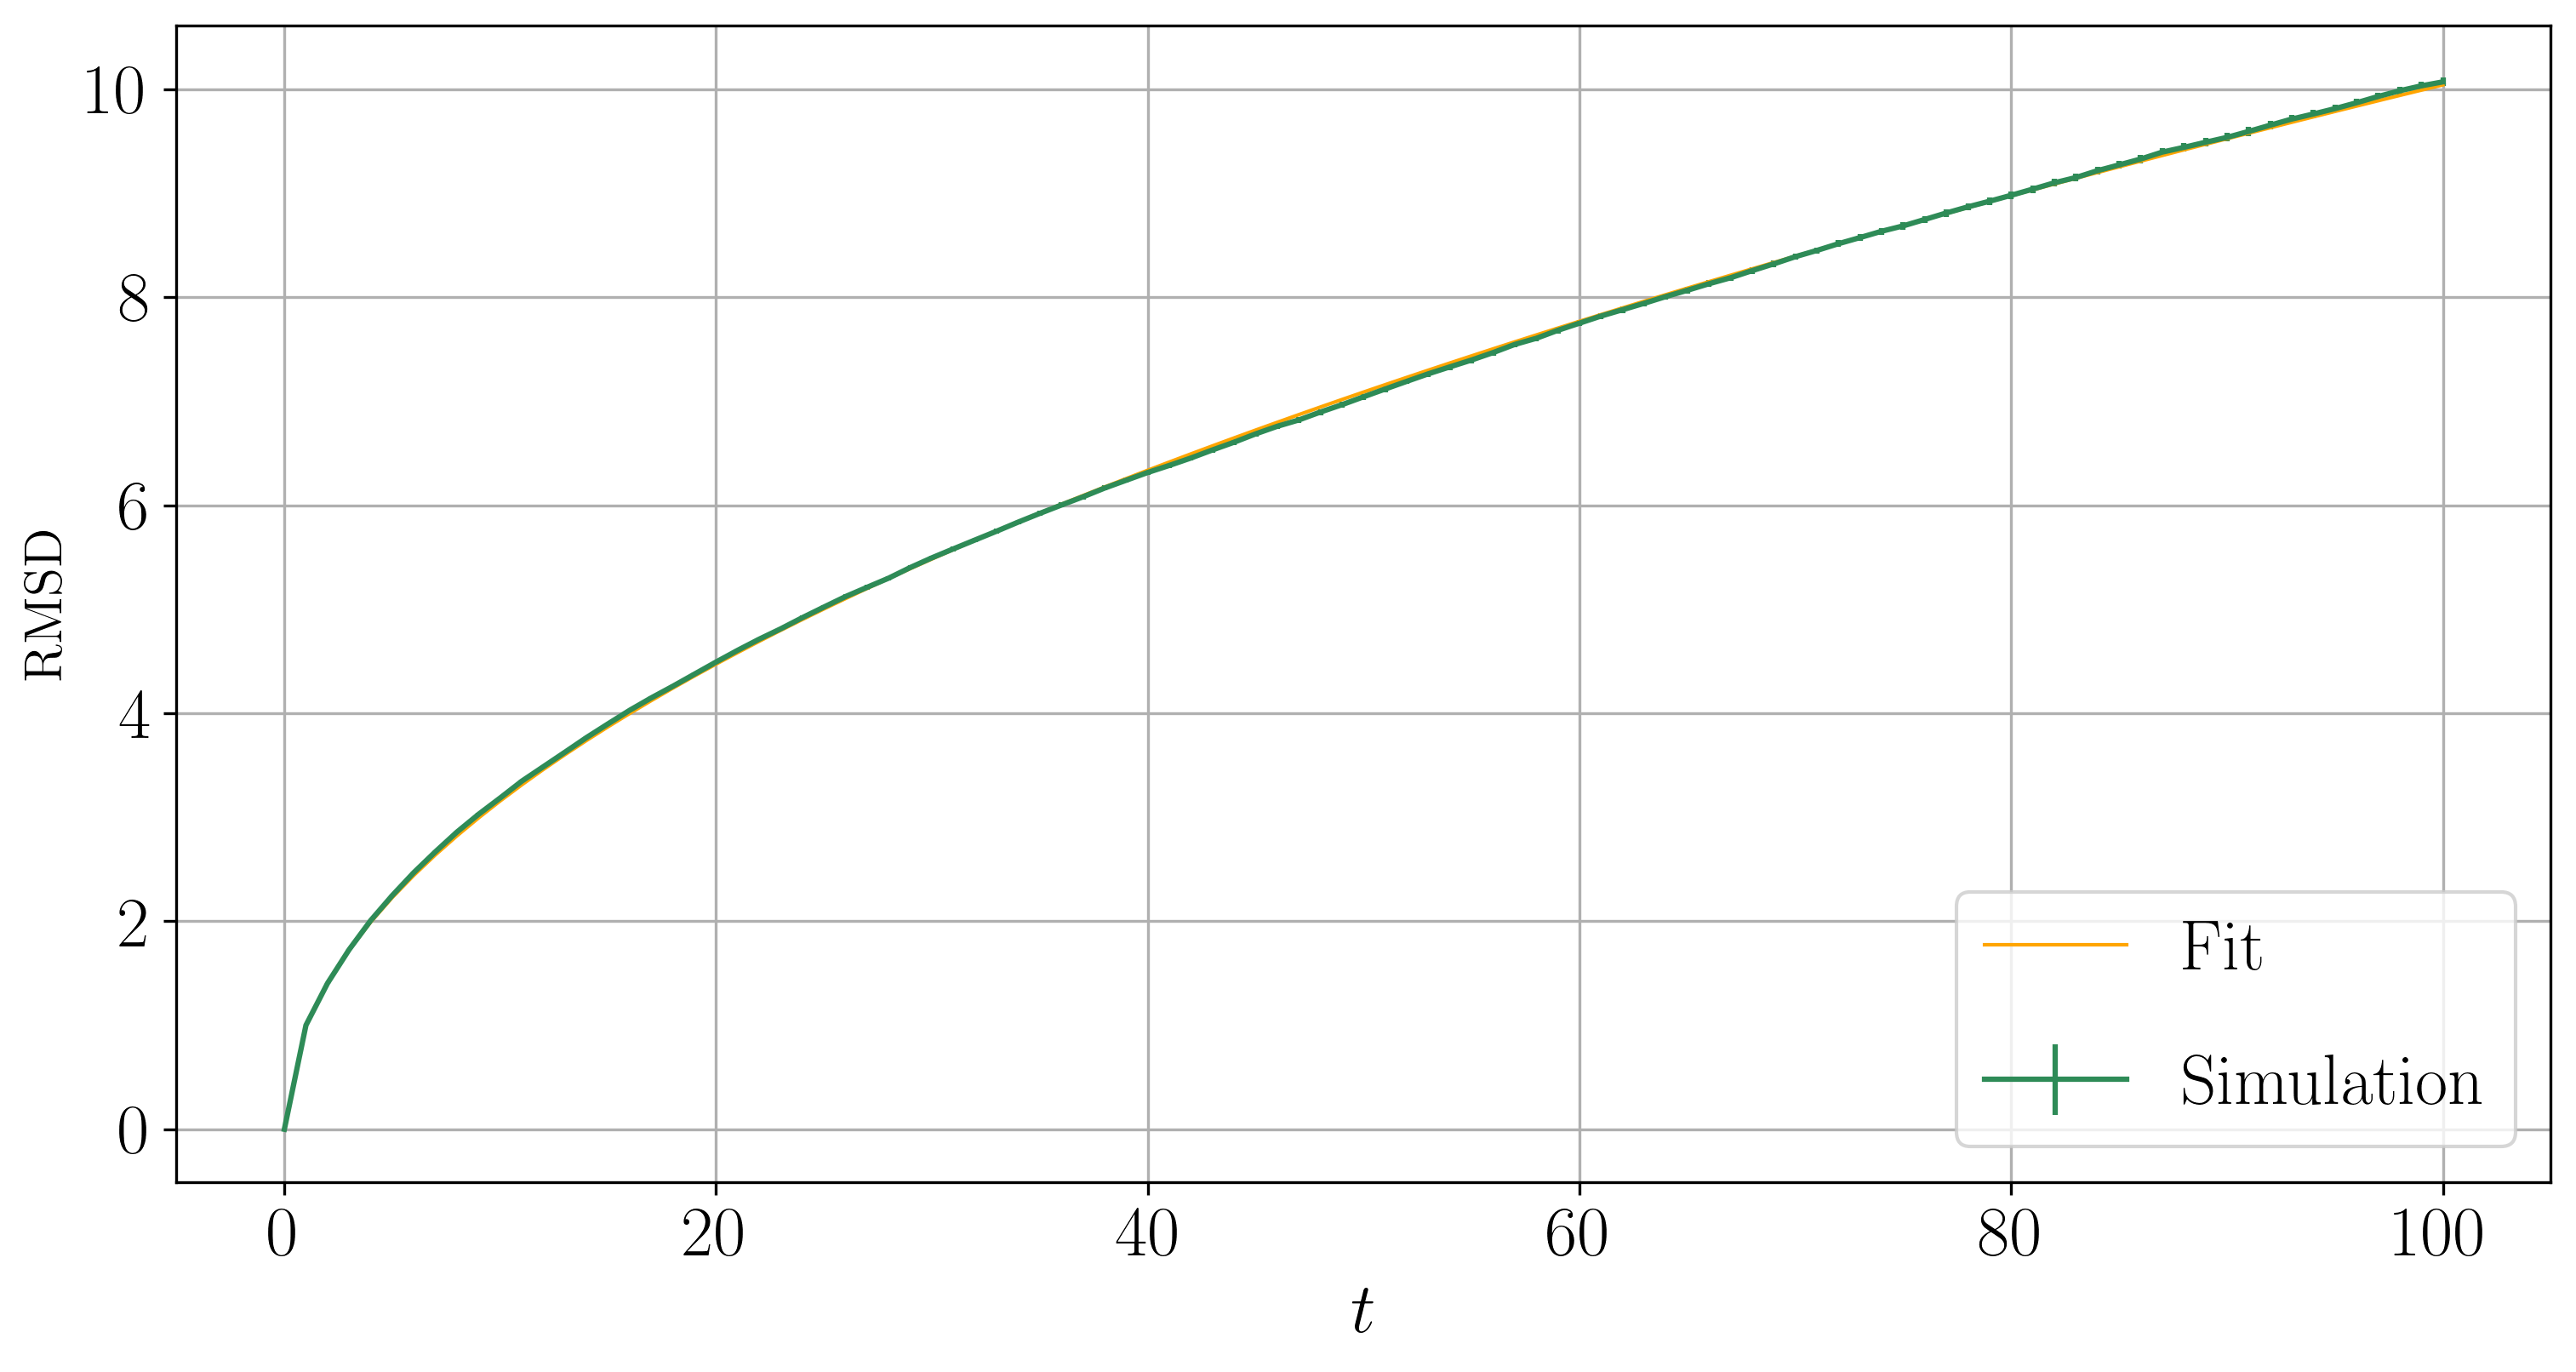

In [5]:
from scipy.optimize import curve_fit

def f(x,k,b):
    return k*x**b

plt.subplots(1, 1, figsize=(12,6), dpi=300)

t, rmsd, err = np.loadtxt("02.2/latticeRW/data/latticeRW.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(t, rmsd, err, c='seagreen', label="Simulation")
plt.xlabel('$t$', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('RMSD', fontsize=15)
plt.yticks(fontsize=20)
plt.grid(True)
#plt.xlim(90,100)
#plt.ylim(9,10.5)

p_opt, p_cov = curve_fit(f, t, rmsd)
y_fit = f(t,p_opt[0],p_opt[1])
plt.plot(t,y_fit,'orange', lw=1, label="Fit")
print("optimized parameters [k b] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.legend(loc='lower right', fontsize=20, labelspacing=1, handlelength=2)

plt.show()

#### <span style="color:darkred">RW IN A CONTINUUM</span>
The same is done for the RW in a continuum.

optimized parameters [k b] =
[1.00637392 0.49667252]
parameters uncertainty =
[0.00121785 0.00029237]


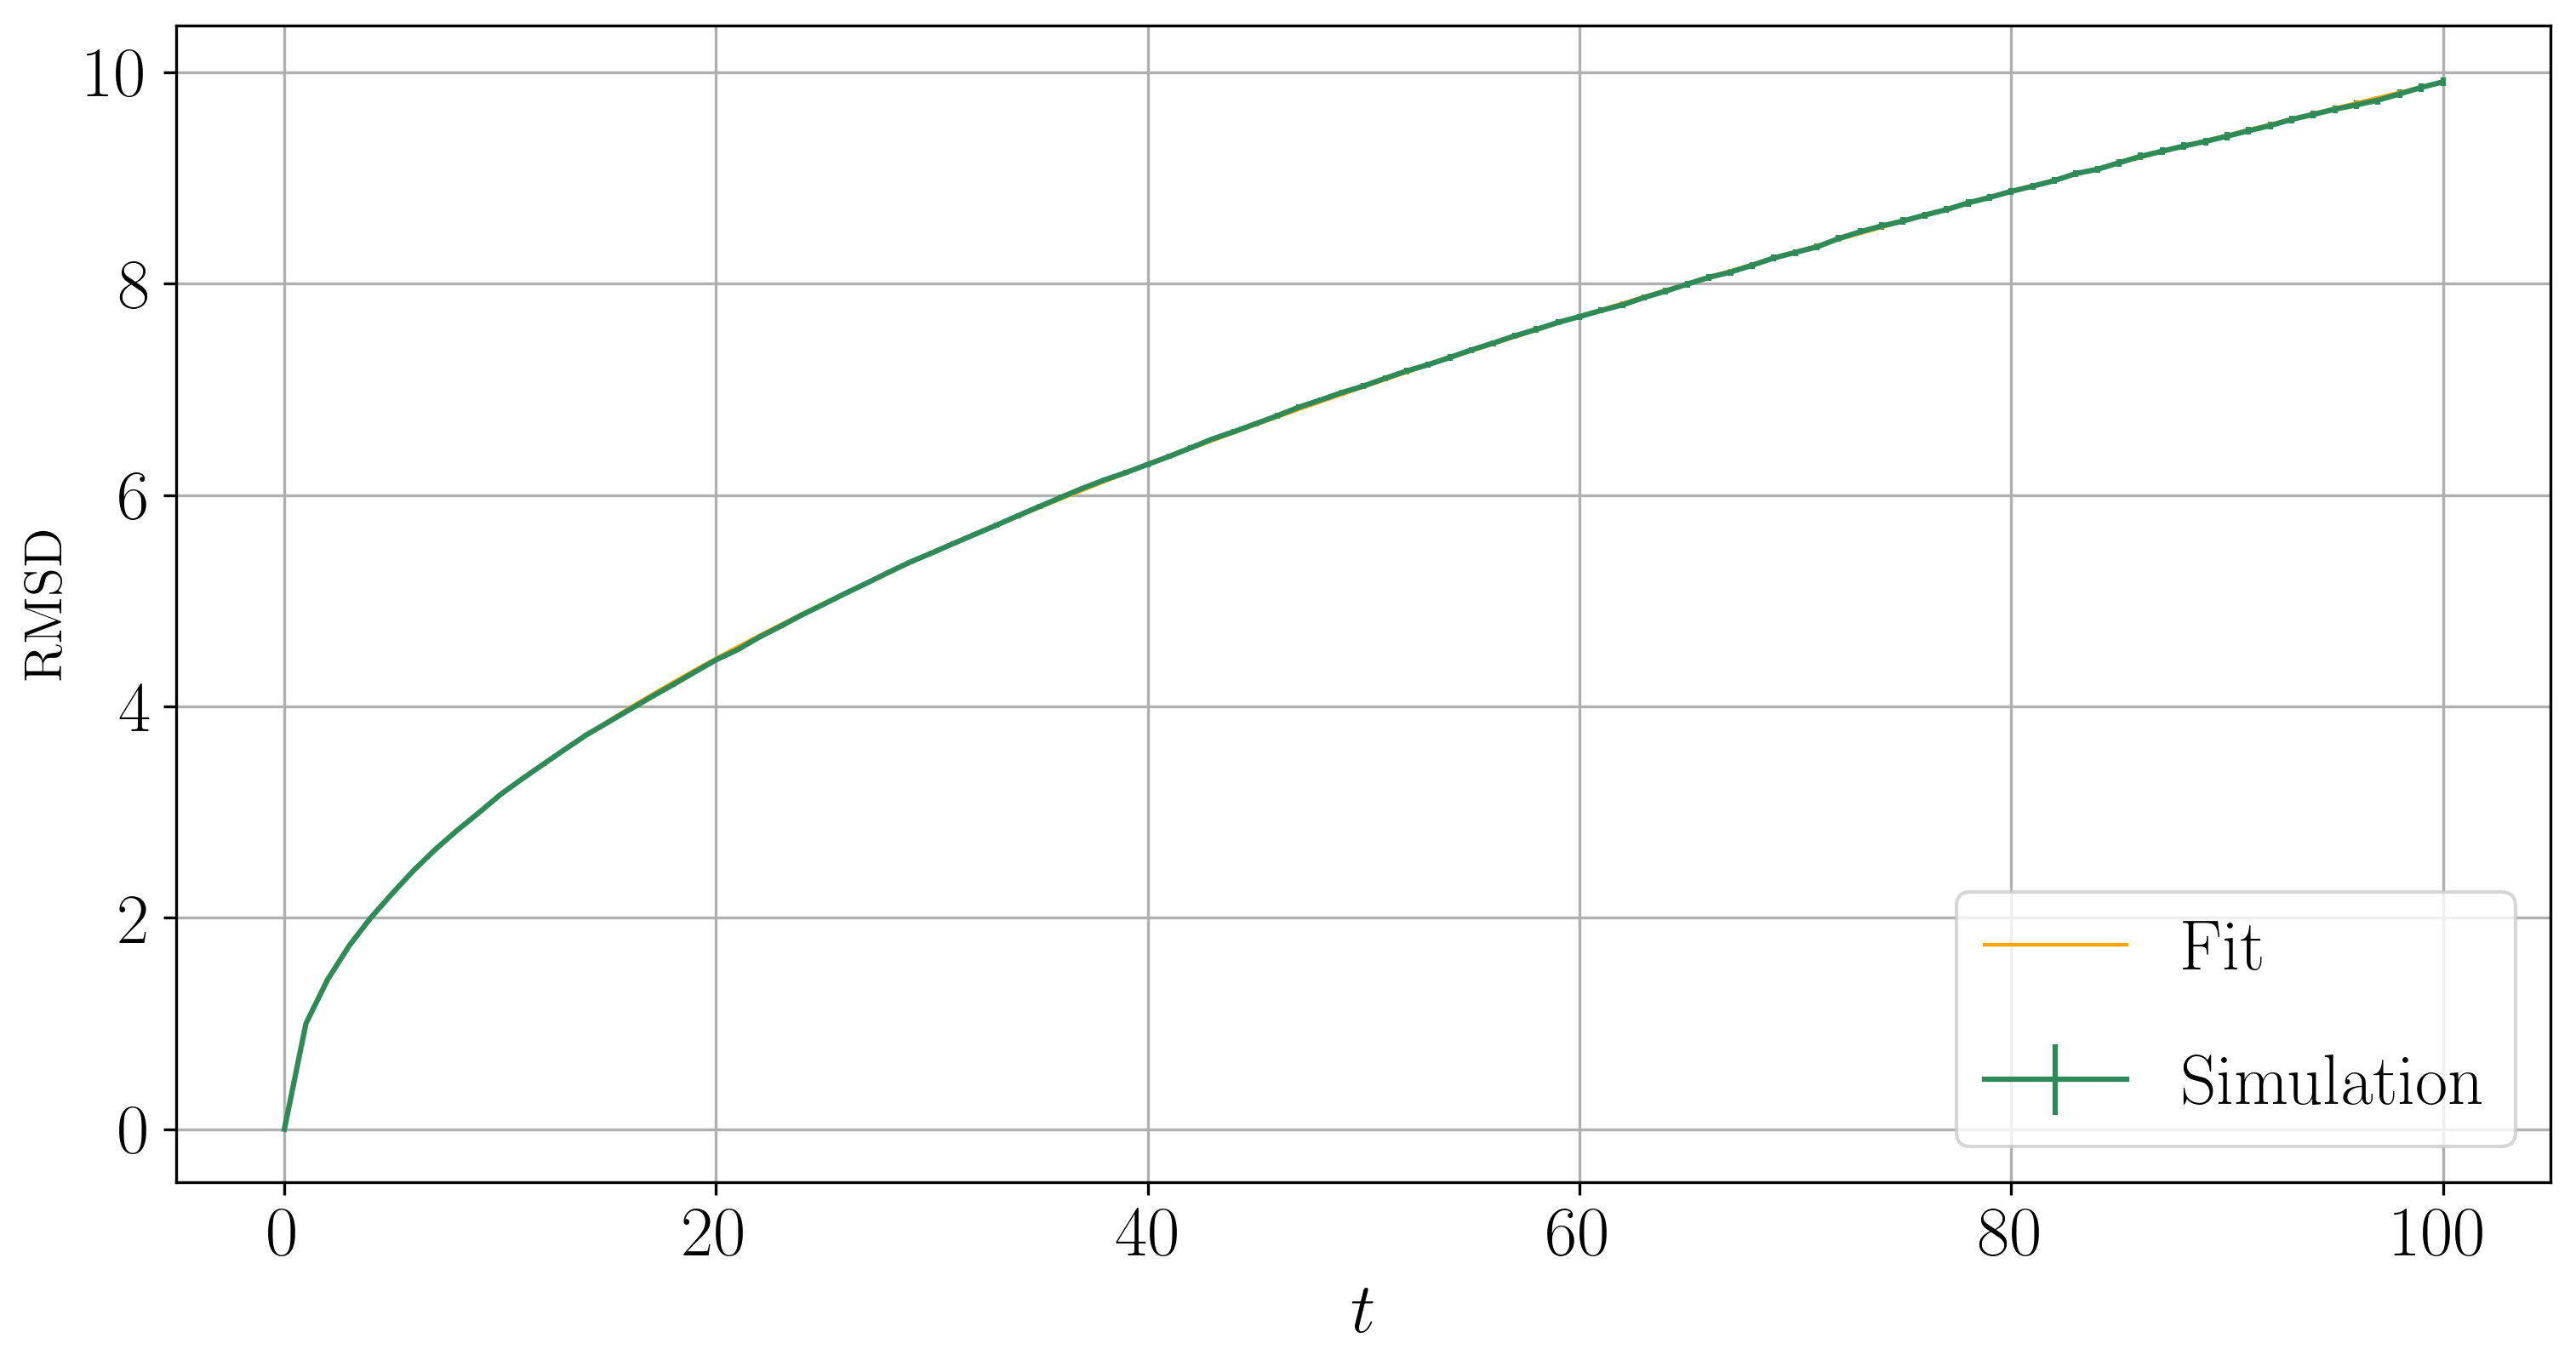

In [6]:
from scipy.optimize import curve_fit

def f(x,k,b):
    return k*x**b

plt.subplots(1, 1, figsize=(12,6), dpi=300)

t, rmsd, err = np.loadtxt("02.2/continuumRW/data/continuumRW.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(t, rmsd, err, c='seagreen', label="Simulation")
plt.xlabel('$t$', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('RMSD', fontsize=15)
plt.yticks(fontsize=20)
plt.grid(True)
#plt.xlim(90,100)
#plt.ylim(9,10.5)

p_opt, p_cov = curve_fit(f, t, rmsd)
y_fit = f(t,p_opt[0],p_opt[1])
plt.plot(t,y_fit,'orange', lw=1, label="Fit")
print("optimized parameters [k b] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.legend(loc='lower right', fontsize=20, labelspacing=1, handlelength=2)

plt.show()